# Face Detection

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [62]:
jason = cv2.imread('Jason.jpg',0)
s = cv2.imread('seleccion.jpg',1)
seleccion = cv2.cvtColor(s, cv2.COLOR_BGR2RGB)

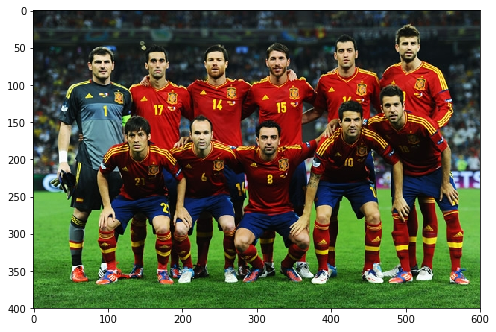

In [63]:
display(seleccion)

In [64]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [65]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [66]:
result = detect_face(seleccion)

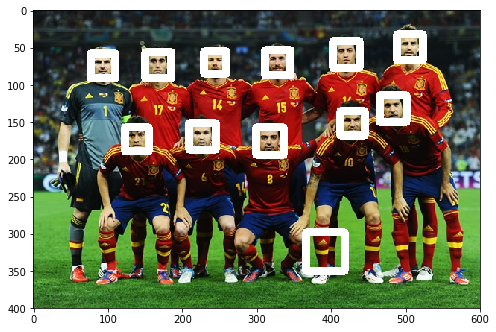

In [67]:
display(result)

In [70]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=3)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(344,255,255),10)
        
    return face_img

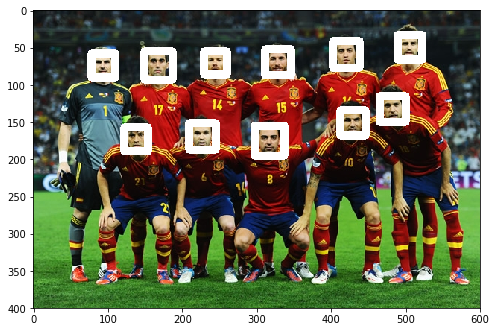

In [71]:
result = adj_detect_face(seleccion)
display(result)

# Eye Detection

In [44]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [45]:
def detect_eyes(img):
    face_img = img.copy()
    
    eyes_rects = eye_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

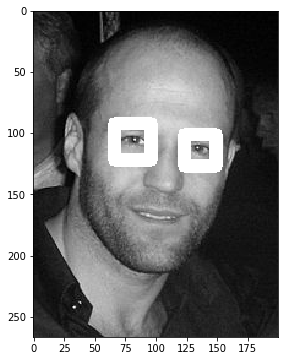

In [46]:
result = detect_eyes(jason)
display(result,cmap='gray')

In [16]:
#Video Detection

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read(0)
    
    frame = detect_eyes(frame)
    
    cv2.imshow('Video Detect', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()